In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data/Healthcare-Diabetes.csv')

In [3]:
## drop id column and check first five row of data
data = data.drop('Id', axis = 1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
## check for missing value
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

there are no mising values (NaN) in the data, missing value in the data are not only denoted by Nan, it can have value like 0, -1, 999

In [5]:
## check summary statistic of numeric feature
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


it show that several feature have 0 as min value, it mean it have missing value, we replace 0 with nan, and do imputation method with nan

In [6]:
## make a copy of dataframe
data1 = data.copy()

In [7]:
## replace 0 with Nan
data1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >]], dtype=object)

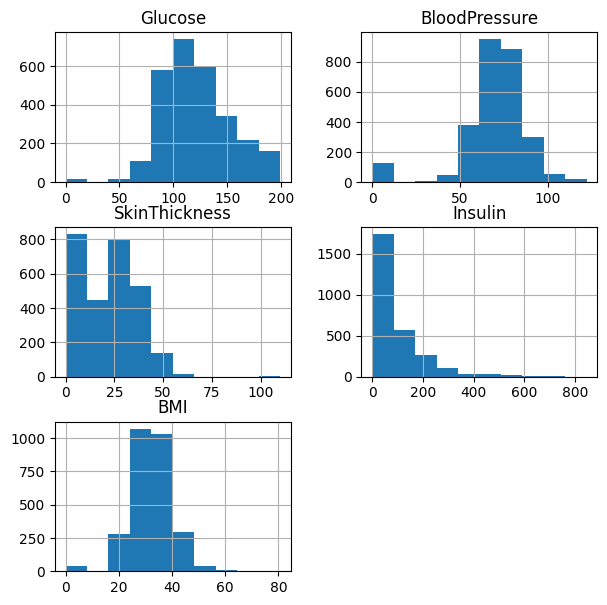

In [8]:
## plot histogram before replace 0 to see distibution
features_with_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[features_with_nan].hist(figsize = (7,7))

In [9]:
## mean imputation for Glucose, BloodPressure and BMI
## median imputation for SkinThickness and Insulin
data1['Glucose'].fillna(data1['Glucose'].mean(), inplace=True)
data1['BloodPressure'].fillna(data1['BloodPressure'].mean(), inplace=True)
data1['BMI'].fillna(data1['BMI'].mean(), inplace=True)
data1['SkinThickness'].fillna(data1['SkinThickness'].mean(), inplace=True)
data1['Insulin'].fillna(data1['Insulin'].mean(), inplace=True)


In [10]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,154.23783,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,154.23783,26.6,0.351,31,0
2,8,183.0,64.0,29.289634,154.23783,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.00000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.00000,43.1,2.288,33,1


In [13]:
data1.to_csv('../notebook/data/cleaned_data.csv')

In [14]:
X = data.drop('Outcome',axis=1)
Y = data[['Outcome']]

In [15]:
numerical_columns = ['Pregnancies','Glucose','BloodPressure', 'SkinThickness',
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical_columns = []
            
num_pipeline=Pipeline(
    steps=[
     ('scaler', StandardScaler(with_mean=False))
    ]
)
            
# cat_pipeline=Pipeline(
#     steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('one_hot_encoder', OneHotEncoder())
#     ('scaler', StandardScaler(with_mean=False))
#     ]
    
# )

preprocessor = ColumnTransformer(
                [
                ('num_pipeline',num_pipeline,numerical_columns)
                ]
            )

In [16]:

xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=123)

In [19]:
xtrain = pd.DataFrame(preprocessor.fit_transform(xtrain),columns=preprocessor.get_feature_names_out())
xtest = pd.DataFrame(preprocessor.transform(xtest),columns=preprocessor.get_feature_names_out())

In [20]:
xtrain.head()

,num_pipeline__Pregnancies,num_pipeline__Glucose,num_pipeline__BloodPressure,num_pipeline__SkinThickness,num_pipeline__Insulin,num_pipeline__BMI,num_pipeline__DiabetesPedigreeFunction,num_pipeline__Age
0,2.104622,3.265166,3.046735,1.472304,0.00000,3.283180,0.925174,2.433492
1,1.803962,2.864721,2.538946,1.840380,0.57318,3.555746,1.112709,1.930011
2,2.405282,2.803114,4.163871,0.000000,0.00000,4.410611,1.834720,5.706120
3,1.202641,4.343287,3.757640,0.000000,0.00000,3.419463,0.762643,3.356541
4,0.601321,4.281680,3.808419,0.000000,0.00000,3.171676,0.521973,2.433492


In [21]:
xtest.head()

,num_pipeline__Pregnancies,num_pipeline__Glucose,num_pipeline__BloodPressure,num_pipeline__SkinThickness,num_pipeline__Insulin,num_pipeline__BMI,num_pipeline__DiabetesPedigreeFunction,num_pipeline__Age
0,0.000000,3.696414,3.757640,1.104228,0.564224,3.778754,0.890792,2.181752
1,0.000000,5.544621,3.351409,2.392493,0.000000,5.203530,5.916736,2.097838
2,1.202641,5.267390,3.656082,0.000000,0.000000,5.401760,1.497156,2.181752
3,0.300660,3.295969,2.538946,1.165574,0.000000,3.506188,0.565731,2.433492
4,2.705943,2.217848,3.960756,1.533650,0.000000,3.915037,0.875164,3.188714


In [22]:
def model_evaluation (true, predicted):
    accuracy = accuracy_score(true, predicted)
    confusionmatrix = confusion_matrix(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    return accuracy,confusionmatrix,precision,recall

In [23]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Adaboost': AdaBoostClassifier(),
    'Gboost': CatBoostClassifier(verbose=False),
    'XGboost': XGBClassifier() 
    
}

model_list = []
accuracy_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(xtrain, ytrain.values.flatten()) # Train model
    
    # Make predictions
    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)
    
    # Evaluate Train and Test dataset
    accuracy_train, confusiomatrix_train, precision_train, recall_train = model_evaluation(ytrain, y_train_pred)

    accuracy_test, confusiomatrix_test, precision_test, recall_test = model_evaluation(ytest, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Train set')
    print("- Accuracy: {:.4f}".format(accuracy_train))
    print("- Confusion Matrix: {}".format(confusiomatrix_train))
    print("- Precision: {:.4f}".format(precision_train))
    print("- Recall: {:.4f}".format(recall_train))
    

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy_test))
    print("- Confusion Matrix: {}".format(confusiomatrix_test))
    print("- Precision: {:.4f}".format(precision_test))
    print("- Recall: {:.4f}".format(recall_test))
    accuracy_list.append(accuracy_test)
    
    print('='*35)
    print('\n')
    

Decision Tree
Model performance for Train set
- Accuracy: 1.0000
- Confusion Matrix: [[1271    0]
 [   0  666]]
- Precision: 1.0000
- Recall: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9771
- Confusion Matrix: [[537   8]
 [ 11 275]]
- Precision: 0.9717
- Recall: 0.9615


KNN
Model performance for Train set
- Accuracy: 0.9241
- Confusion Matrix: [[1204   67]
 [  80  586]]
- Precision: 0.8974
- Recall: 0.8799
----------------------------------
Model performance for Test set
- Accuracy: 0.8075
- Confusion Matrix: [[476  69]
 [ 91 195]]
- Precision: 0.7386
- Recall: 0.6818


Logistic Regression
Model performance for Train set
- Accuracy: 0.7780
- Confusion Matrix: [[1142  129]
 [ 301  365]]
- Precision: 0.7389
- Recall: 0.5480
----------------------------------
Model performance for Test set
- Accuracy: 0.7750
- Confusion Matrix: [[483  62]
 [125 161]]
- Precision: 0.7220
- Recall: 0.5629


Random Forest
Model performance for Train set
- Accuracy

In [24]:
df_results = pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)
df_results

,Model Name,Accuracy
3,Random Forest,0.986763
0,Decision Tree,0.977136
8,XGboost,0.968712
7,Gboost,0.953069
6,Adaboost,0.814681
1,KNN,0.807461
4,SVM,0.800241
2,Logistic Regression,0.774970
5,Naive Bayes,0.755716
